# Exploration of PyCaret Setup attributes : Transformation method

In this notebook we explore the PyCaret Setup attributes through the HAIM Edema experiment and visualize their impact on results.

PyCaret documentation :
- setup() function from Classification module : https://pycaret.readthedocs.io/en/stable/api/classification.html#pycaret.classification.setup
- Data Preprocessing : https://pycaret.gitbook.io/docs/get-started/preprocessing
- Classification module : https://pycaret.readthedocs.io/en/stable/api/classification.html
- Home : https://pycaret.readthedocs.io/en/stable/

The transformation_method attribute :

*str, default = ‘yeo-johnson’*

Defines the method for transformation. By default, the transformation method is set to ‘yeo-johnson’. The other available option for transformation is ‘quantile’. Ignored when `transformation` is not True.

## Settings

In [1]:
# Import
from utils import *
from pycaret.classification import ClassificationExperiment
from sklearn.model_selection import StratifiedGroupKFold

In [2]:
# Load data
df = get_experiment_df()

## Setup

In [3]:
exp = ClassificationExperiment()
exp.setup(df, target=EXPERIMENT, train_size=0.8, fold_strategy=StratifiedGroupKFold(), fold_groups='haim_id', fold=5, transformation=True, transformation_method='quantile')

,Description,Value
0,Session id,5981
1,Target,Edema
2,Target type,Binary
3,Original data shape,"(17182, 4079)"
4,Transformed data shape,"(17182, 4079)"
5,Transformed train set shape,"(13745, 4079)"
6,Transformed test set shape,"(3437, 4079)"
7,Numeric features,4078
8,Preprocess,True
9,Imputation type,simple


## Create model

In [4]:
exp_model = exp.create_model(MODEL)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8232,0.8899,0.8776,0.8446,0.8607,0.6191,0.6199
1,0.8307,0.9062,0.8819,0.8516,0.8665,0.6355,0.6362
2,0.8183,0.8916,0.8814,0.8359,0.8580,0.6064,0.6080
3,0.8284,0.8975,0.8803,0.8496,0.8647,0.6305,0.6313
4,0.8375,0.9092,0.8971,0.8503,0.8731,0.6478,0.6496
Mean,0.8277,0.8989,0.8837,0.8464,0.8646,0.6278,0.6290
Std,0.0065,0.0077,0.0069,0.0058,0.0052,0.0142,0.0142


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune model

In [5]:
exp_model = exp.tune_model(exp_model, custom_grid=TUNING_GRID, optimize=OPTIMIZE)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8294,0.9026,0.8869,0.8464,0.8662,0.6313,0.6326
1,0.8424,0.9178,0.8942,0.8586,0.8760,0.6599,0.6609
2,0.8256,0.9070,0.8919,0.8385,0.8643,0.6210,0.6233
3,0.8324,0.9092,0.8908,0.8478,0.8688,0.6374,0.6389
4,0.8430,0.9189,0.9041,0.8527,0.8777,0.6591,0.6613
Mean,0.8346,0.9111,0.8936,0.8488,0.8706,0.6417,0.6434
Std,0.0070,0.0063,0.0058,0.0067,0.0053,0.0154,0.0153


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


## Analyze model
### AUC curve

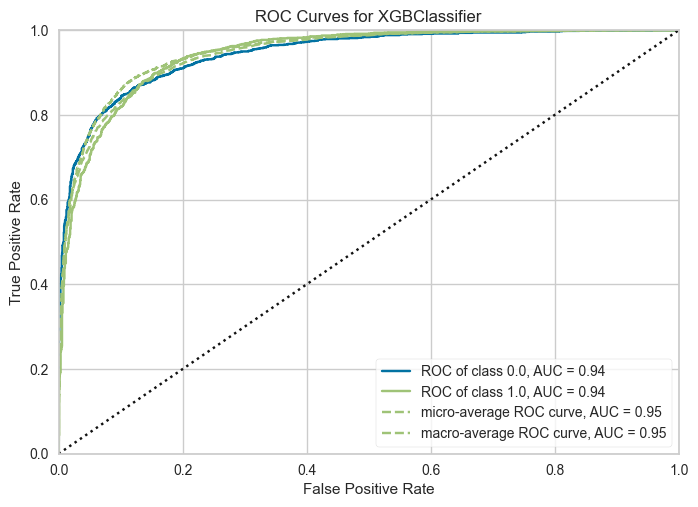

In [6]:
exp.plot_model(exp_model, plot='auc')

### Feature importance

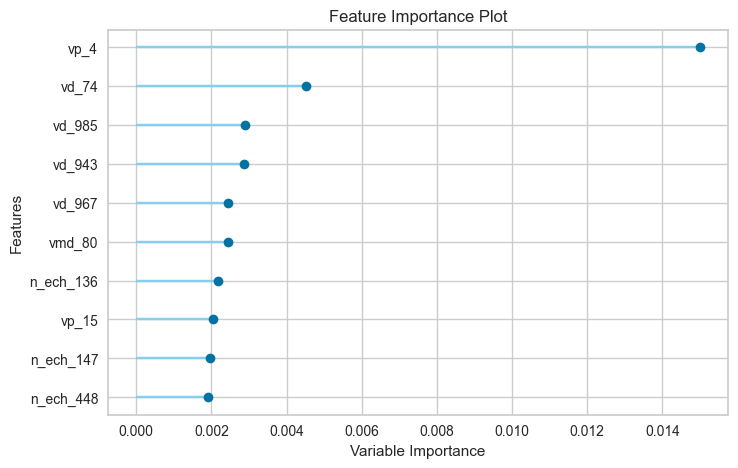

In [7]:
exp.plot_model(exp_model, plot='feature')

## Interpret model

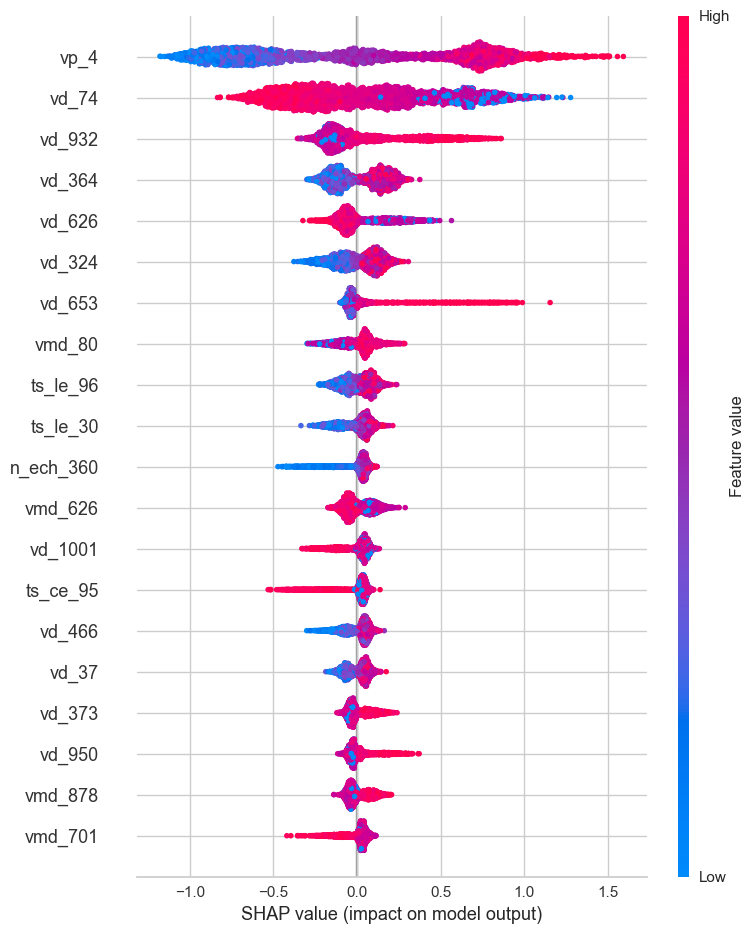

In [8]:
exp.interpret_model(exp_model, plot='summary')